In [1]:
# std
import os
import sys
import re

# 3rd party
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def get_path(filename, dirname=None):
    root = os.path.dirname(os.path.dirname(os.getcwd()))
    path = os.path.join(root, dirname, filename) if dirname else os.path.join(root, filename)

    return path

In [3]:
path = get_path('hntn_train_validate_and_test_wn18_200d_cost.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Regularised-Relations/results/hntn_train_validate_and_test_wn18_200d_cost.csv'

In [4]:
results_cost = pd.read_csv(path)
results_cost.head()

,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis,cost_training_baseline,cost_validation_baseline,cost_test_baseline
0,0.000642,0.000678,0.000676,0.000869,0.000869,0.000864
1,0.000698,0.000717,0.000717,0.001057,0.001069,0.001070
2,0.000668,0.000693,0.000692,0.001112,0.001132,0.001132
3,0.000689,0.000708,0.000706,0.001067,0.001075,0.001076
4,0.000693,0.000711,0.000710,0.001095,0.001099,0.001098


In [5]:
results_cost = results_cost.reset_index()
results_cost.head()

,index,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis,cost_training_baseline,cost_validation_baseline,cost_test_baseline
0,0,0.000642,0.000678,0.000676,0.000869,0.000869,0.000864
1,1,0.000698,0.000717,0.000717,0.001057,0.001069,0.001070
2,2,0.000668,0.000693,0.000692,0.001112,0.001132,0.001132
3,3,0.000689,0.000708,0.000706,0.001067,0.001075,0.001076
4,4,0.000693,0.000711,0.000710,0.001095,0.001099,0.001098


In [6]:
results_cost = results_cost.rename(columns={'index': 'epoch'})
results_cost.head()

,epoch,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis,cost_training_baseline,cost_validation_baseline,cost_test_baseline
0,0,0.000642,0.000678,0.000676,0.000869,0.000869,0.000864
1,1,0.000698,0.000717,0.000717,0.001057,0.001069,0.001070
2,2,0.000668,0.000693,0.000692,0.001112,0.001132,0.001132
3,3,0.000689,0.000708,0.000706,0.001067,0.001075,0.001076
4,4,0.000693,0.000711,0.000710,0.001095,0.001099,0.001098


In [7]:
results_cost['epoch'] += 1
results_cost.head()

,epoch,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis,cost_training_baseline,cost_validation_baseline,cost_test_baseline
0,1,0.000642,0.000678,0.000676,0.000869,0.000869,0.000864
1,2,0.000698,0.000717,0.000717,0.001057,0.001069,0.001070
2,3,0.000668,0.000693,0.000692,0.001112,0.001132,0.001132
3,4,0.000689,0.000708,0.000706,0.001067,0.001075,0.001076
4,5,0.000693,0.000711,0.000710,0.001095,0.001099,0.001098


In [8]:
results_cost = results_cost.drop(['cost_test_baseline', 'cost_test_hypothesis'], axis=1)
results_cost['epoch'] = results_cost['epoch'] * 10
results_cost.head()

,epoch,cost_training_hypothesis,cost_validation_hypothesis,cost_training_baseline,cost_validation_baseline
0,10,0.000642,0.000678,0.000869,0.000869
1,20,0.000698,0.000717,0.001057,0.001069
2,30,0.000668,0.000693,0.001112,0.001132
3,40,0.000689,0.000708,0.001067,0.001075
4,50,0.000693,0.000711,0.001095,0.001099


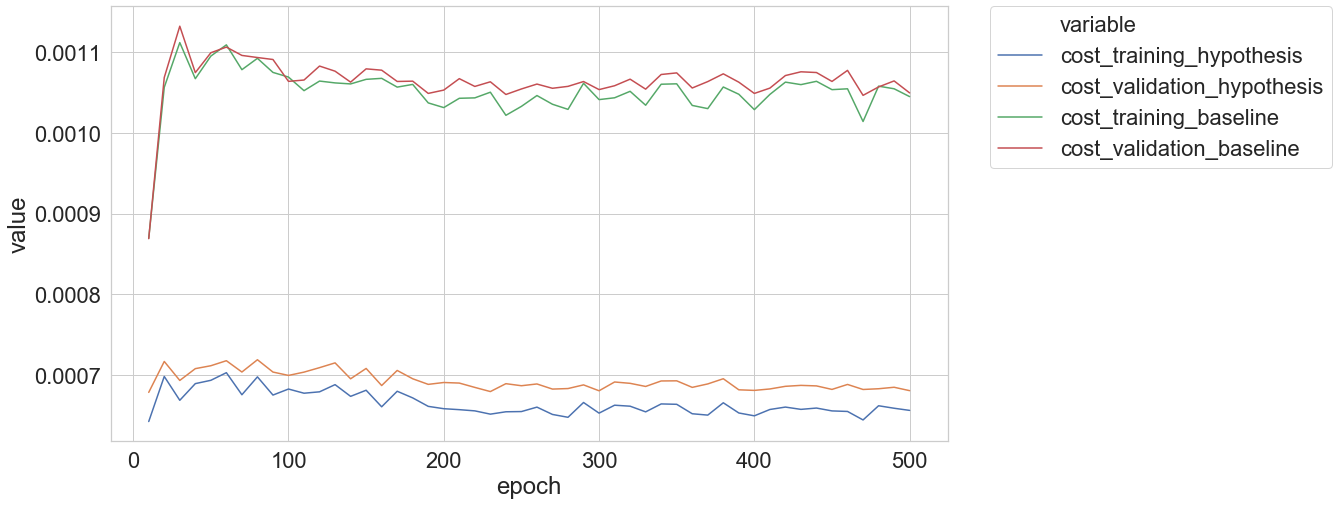

In [9]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 

ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_cost[:50], ['epoch']))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('WN18_Cost_Results.png', bbox_inches = "tight", format='PNG')

In [10]:
# plt.figure(figsize=(15, 8))
# sns.set(style='whitegrid', font_scale=2) 
# ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_cost[50:], ['epoch']))
# plt.savefig('WN18_Cost_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [11]:
path = get_path('hntn_train_validate_and_test_wn18_200d_hits_at_10.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Regularised-Relations/results/hntn_train_validate_and_test_wn18_200d_hits_at_10.csv'

In [12]:
results_hits_at_10 = pd.read_csv(path)
results_hits_at_10.head()

,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline
0,0.9927,0.9088,0.9146,0.0751,0.0742,0.0692
1,0.9985,0.9438,0.9520,0.9979,0.9389,0.9443
2,0.9997,0.9466,0.9521,0.9997,0.9466,0.9534
3,0.9997,0.9463,0.9538,0.9995,0.9455,0.9533
4,0.9997,0.9463,0.9548,0.9994,0.9483,0.9541


In [13]:
results_hits_at_10 = results_hits_at_10.reset_index()
results_hits_at_10.head()

,index,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline
0,0,0.9927,0.9088,0.9146,0.0751,0.0742,0.0692
1,1,0.9985,0.9438,0.9520,0.9979,0.9389,0.9443
2,2,0.9997,0.9466,0.9521,0.9997,0.9466,0.9534
3,3,0.9997,0.9463,0.9538,0.9995,0.9455,0.9533
4,4,0.9997,0.9463,0.9548,0.9994,0.9483,0.9541


In [14]:
results_hits_at_10 = results_hits_at_10.rename(columns={'index': 'epoch'})
results_hits_at_10.head()

,epoch,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline
0,0,0.9927,0.9088,0.9146,0.0751,0.0742,0.0692
1,1,0.9985,0.9438,0.9520,0.9979,0.9389,0.9443
2,2,0.9997,0.9466,0.9521,0.9997,0.9466,0.9534
3,3,0.9997,0.9463,0.9538,0.9995,0.9455,0.9533
4,4,0.9997,0.9463,0.9548,0.9994,0.9483,0.9541


In [15]:
results_hits_at_10['epoch'] += 1
results_hits_at_10.head()

,epoch,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline
0,1,0.9927,0.9088,0.9146,0.0751,0.0742,0.0692
1,2,0.9985,0.9438,0.9520,0.9979,0.9389,0.9443
2,3,0.9997,0.9466,0.9521,0.9997,0.9466,0.9534
3,4,0.9997,0.9463,0.9538,0.9995,0.9455,0.9533
4,5,0.9997,0.9463,0.9548,0.9994,0.9483,0.9541


In [16]:
results_hits_at_10_test = results_hits_at_10[['hits_at_10_test_baseline', 'hits_at_10_test_hypothesis']]
results_hits_at_10_test.head()

,hits_at_10_test_baseline,hits_at_10_test_hypothesis
0,0.0692,0.9146
1,0.9443,0.9520
2,0.9534,0.9521
3,0.9533,0.9538
4,0.9541,0.9548


In [17]:
results_hits_at_10_test.max()

hits_at_10_test_baseline      0.9570
hits_at_10_test_hypothesis    0.9565
dtype: float64

In [18]:
results_hits_at_10 = results_hits_at_10.drop(['hits_at_10_test_baseline', 'hits_at_10_test_hypothesis'], axis=1)
results_hits_at_10['epoch'] = results_hits_at_10['epoch'] * 10
results_hits_at_10.head()

,epoch,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_training_baseline,hits_at_10_validation_baseline
0,10,0.9927,0.9088,0.0751,0.0742
1,20,0.9985,0.9438,0.9979,0.9389
2,30,0.9997,0.9466,0.9997,0.9466
3,40,0.9997,0.9463,0.9995,0.9455
4,50,0.9997,0.9463,0.9994,0.9483


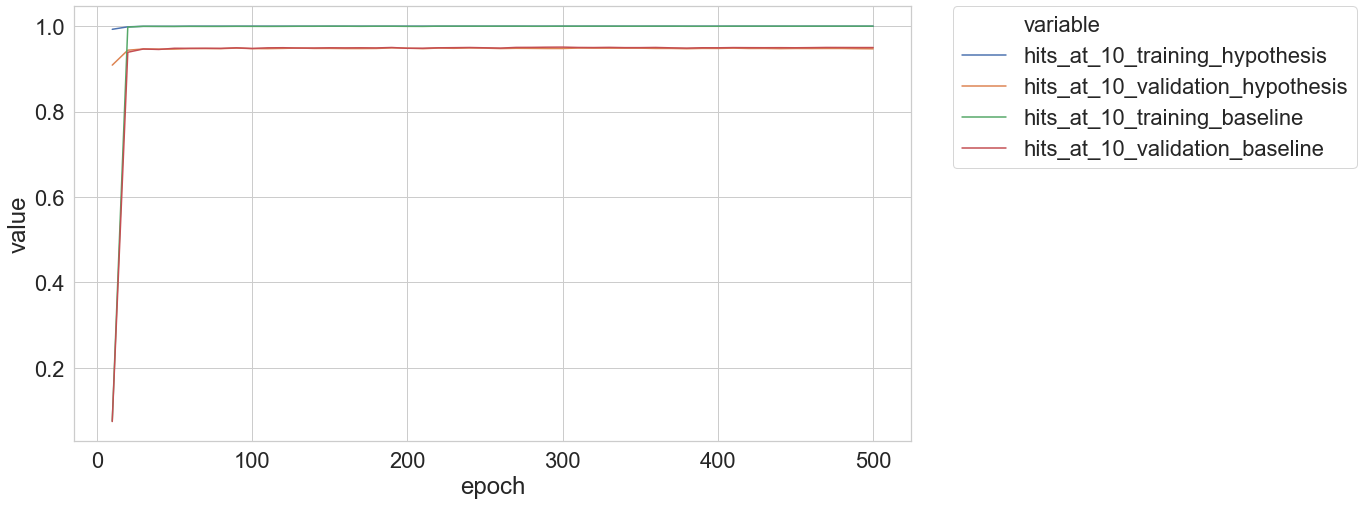

In [19]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 

ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_10[:50], ['epoch']))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('WN18_hits_at_10_Results.png', bbox_inches = "tight", format='PNG')

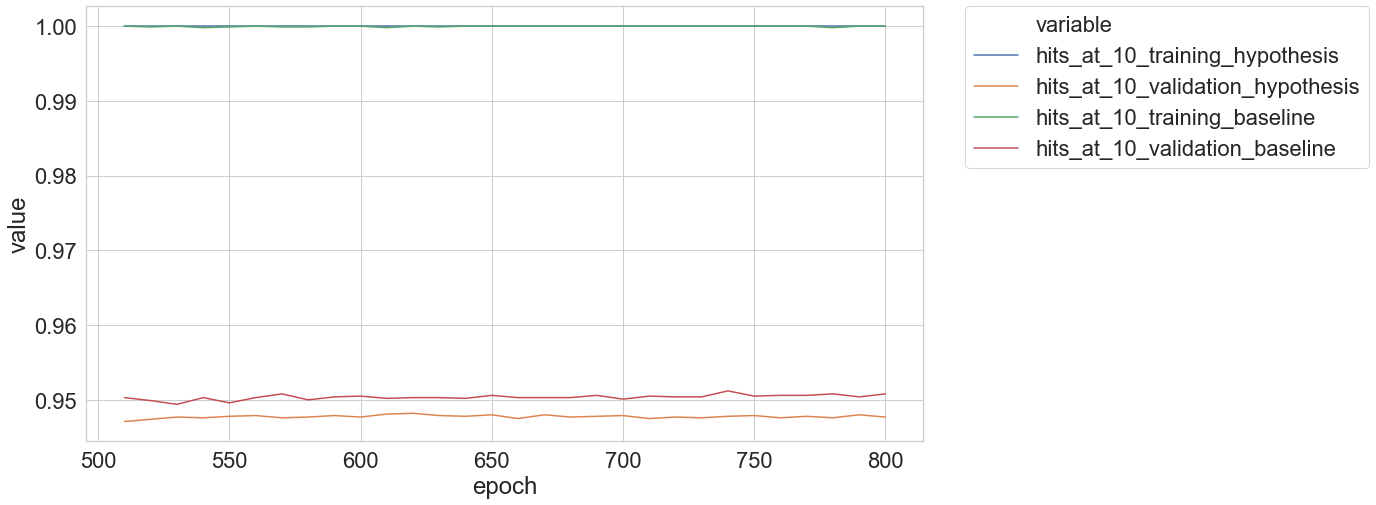

In [20]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 

ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_10[50:], ['epoch']))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig('WN18_hits_at_10_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [21]:
path = get_path('hntn_train_validate_and_test_wn18_200d_hits_at_3.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Regularised-Relations/results/hntn_train_validate_and_test_wn18_200d_hits_at_3.csv'

In [22]:
results_hits_at_3 = pd.read_csv(path)
results_hits_at_3.head()

,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline
0,0.9813,0.8728,0.8949,0.0470,0.0455,0.0435
1,0.9946,0.9160,0.9477,0.9921,0.8939,0.9221
2,0.9976,0.9186,0.9477,0.9977,0.9155,0.9484
3,0.9990,0.9209,0.9496,0.9982,0.9180,0.9492
4,0.9993,0.9183,0.9507,0.9973,0.9206,0.9500


In [23]:
results_hits_at_3 = results_hits_at_3.reset_index()
results_hits_at_3.head()

,index,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline
0,0,0.9813,0.8728,0.8949,0.0470,0.0455,0.0435
1,1,0.9946,0.9160,0.9477,0.9921,0.8939,0.9221
2,2,0.9976,0.9186,0.9477,0.9977,0.9155,0.9484
3,3,0.9990,0.9209,0.9496,0.9982,0.9180,0.9492
4,4,0.9993,0.9183,0.9507,0.9973,0.9206,0.9500


In [24]:
results_hits_at_3 = results_hits_at_3.rename(columns={'index': 'epoch'})
results_hits_at_3.head()

,epoch,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline
0,0,0.9813,0.8728,0.8949,0.0470,0.0455,0.0435
1,1,0.9946,0.9160,0.9477,0.9921,0.8939,0.9221
2,2,0.9976,0.9186,0.9477,0.9977,0.9155,0.9484
3,3,0.9990,0.9209,0.9496,0.9982,0.9180,0.9492
4,4,0.9993,0.9183,0.9507,0.9973,0.9206,0.9500


In [25]:
results_hits_at_3['epoch'] += 1
results_hits_at_3.head()

,epoch,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline
0,1,0.9813,0.8728,0.8949,0.0470,0.0455,0.0435
1,2,0.9946,0.9160,0.9477,0.9921,0.8939,0.9221
2,3,0.9976,0.9186,0.9477,0.9977,0.9155,0.9484
3,4,0.9990,0.9209,0.9496,0.9982,0.9180,0.9492
4,5,0.9993,0.9183,0.9507,0.9973,0.9206,0.9500


In [26]:
results_hits_at_3_test = results_hits_at_3[['hits_at_3_test_baseline', 'hits_at_3_test_hypothesis']]
results_hits_at_3_test.head()

,hits_at_3_test_baseline,hits_at_3_test_hypothesis
0,0.0435,0.8949
1,0.9221,0.9477
2,0.9484,0.9477
3,0.9492,0.9496
4,0.9500,0.9507


In [27]:
results_hits_at_3_test.max()

hits_at_3_test_baseline      0.9530
hits_at_3_test_hypothesis    0.9535
dtype: float64

In [28]:
results_hits_at_3 = results_hits_at_3.drop(['hits_at_3_test_baseline', 'hits_at_3_test_hypothesis'], axis=1)
results_hits_at_3['epoch'] = results_hits_at_3['epoch'] * 10
results_hits_at_3.head()

,epoch,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_training_baseline,hits_at_3_validation_baseline
0,10,0.9813,0.8728,0.0470,0.0455
1,20,0.9946,0.9160,0.9921,0.8939
2,30,0.9976,0.9186,0.9977,0.9155
3,40,0.9990,0.9209,0.9982,0.9180
4,50,0.9993,0.9183,0.9973,0.9206


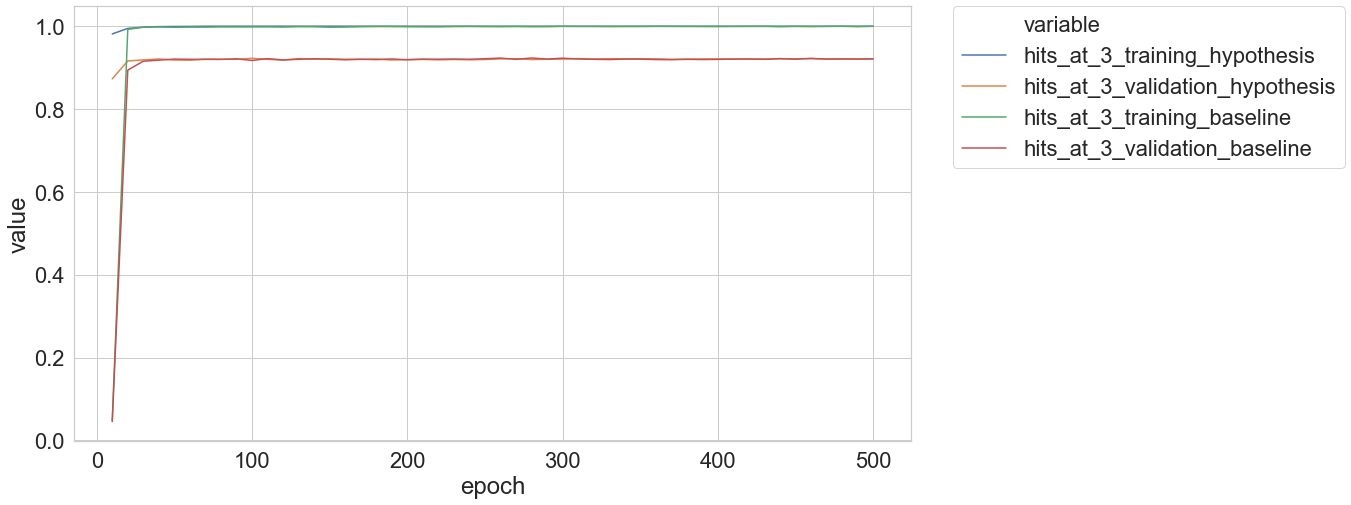

In [29]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 

ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_3[:50], ['epoch']))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('WN18_hits_at_3_Results.png', bbox_inches = "tight", format='PNG')

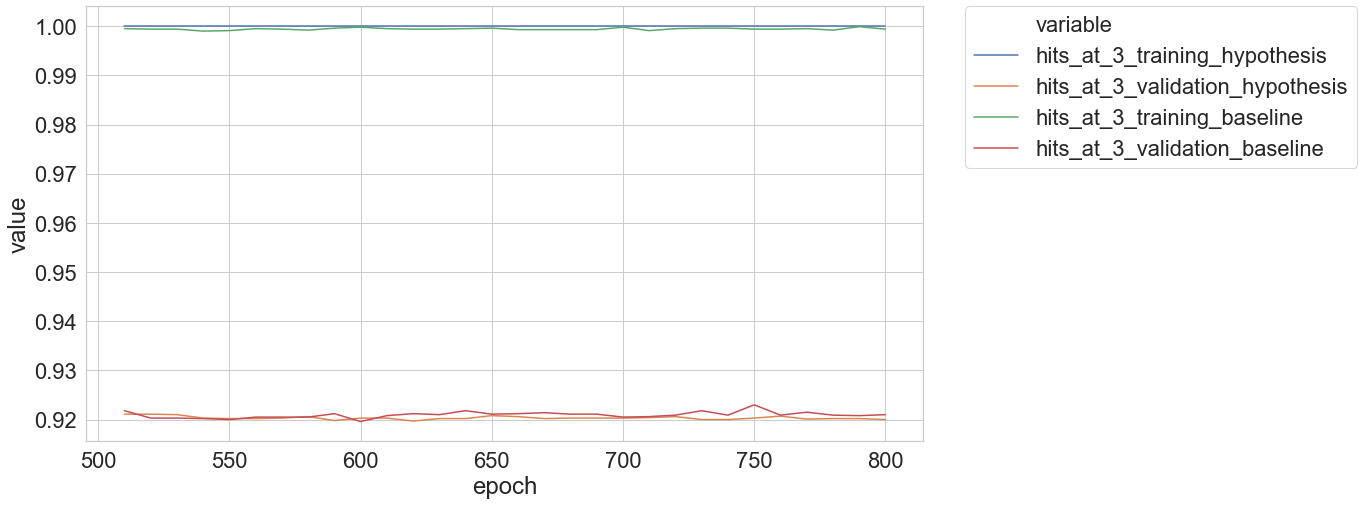

In [30]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 

ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_3[50:], ['epoch']))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('WN18_hits_at_3_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [31]:
path = get_path('hntn_train_validate_and_test_wn18_200d_hits_at_1.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Regularised-Relations/results/hntn_train_validate_and_test_wn18_200d_hits_at_1.csv'

In [32]:
results_hits_at_1 = pd.read_csv(path)
results_hits_at_1.head()

,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline
0,0.9506,0.7982,0.8581,0.0281,0.0259,0.0276
1,0.9793,0.8504,0.9368,0.9718,0.7638,0.8284
2,0.9903,0.8552,0.9397,0.9900,0.8506,0.9389
3,0.9960,0.8555,0.9428,0.9924,0.8561,0.9425
4,0.9968,0.8540,0.9439,0.9920,0.8526,0.9442


In [33]:
results_hits_at_1 = results_hits_at_1.reset_index()
results_hits_at_1.head()

,index,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline
0,0,0.9506,0.7982,0.8581,0.0281,0.0259,0.0276
1,1,0.9793,0.8504,0.9368,0.9718,0.7638,0.8284
2,2,0.9903,0.8552,0.9397,0.9900,0.8506,0.9389
3,3,0.9960,0.8555,0.9428,0.9924,0.8561,0.9425
4,4,0.9968,0.8540,0.9439,0.9920,0.8526,0.9442


In [34]:
results_hits_at_1 = results_hits_at_1.rename(columns={'index': 'epoch'})
results_hits_at_1.head()

,epoch,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline
0,0,0.9506,0.7982,0.8581,0.0281,0.0259,0.0276
1,1,0.9793,0.8504,0.9368,0.9718,0.7638,0.8284
2,2,0.9903,0.8552,0.9397,0.9900,0.8506,0.9389
3,3,0.9960,0.8555,0.9428,0.9924,0.8561,0.9425
4,4,0.9968,0.8540,0.9439,0.9920,0.8526,0.9442


In [35]:
results_hits_at_1['epoch'] += 1
results_hits_at_1.head()

,epoch,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline
0,1,0.9506,0.7982,0.8581,0.0281,0.0259,0.0276
1,2,0.9793,0.8504,0.9368,0.9718,0.7638,0.8284
2,3,0.9903,0.8552,0.9397,0.9900,0.8506,0.9389
3,4,0.9960,0.8555,0.9428,0.9924,0.8561,0.9425
4,5,0.9968,0.8540,0.9439,0.9920,0.8526,0.9442


In [36]:
results_hits_at_1_test = results_hits_at_1[['hits_at_1_test_baseline', 'hits_at_1_test_hypothesis']]
results_hits_at_1_test.head()

,hits_at_1_test_baseline,hits_at_1_test_hypothesis
0,0.0276,0.8581
1,0.8284,0.9368
2,0.9389,0.9397
3,0.9425,0.9428
4,0.9442,0.9439


In [37]:
results_hits_at_1_test.max()

hits_at_1_test_baseline      0.9467
hits_at_1_test_hypothesis    0.9458
dtype: float64

In [38]:
results_hits_at_1 = results_hits_at_1.drop(['hits_at_1_test_baseline', 'hits_at_1_test_hypothesis'], axis=1)
results_hits_at_1['epoch'] = results_hits_at_1['epoch'] * 10
results_hits_at_1.head()

,epoch,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_training_baseline,hits_at_1_validation_baseline
0,10,0.9506,0.7982,0.0281,0.0259
1,20,0.9793,0.8504,0.9718,0.7638
2,30,0.9903,0.8552,0.9900,0.8506
3,40,0.9960,0.8555,0.9924,0.8561
4,50,0.9968,0.8540,0.9920,0.8526


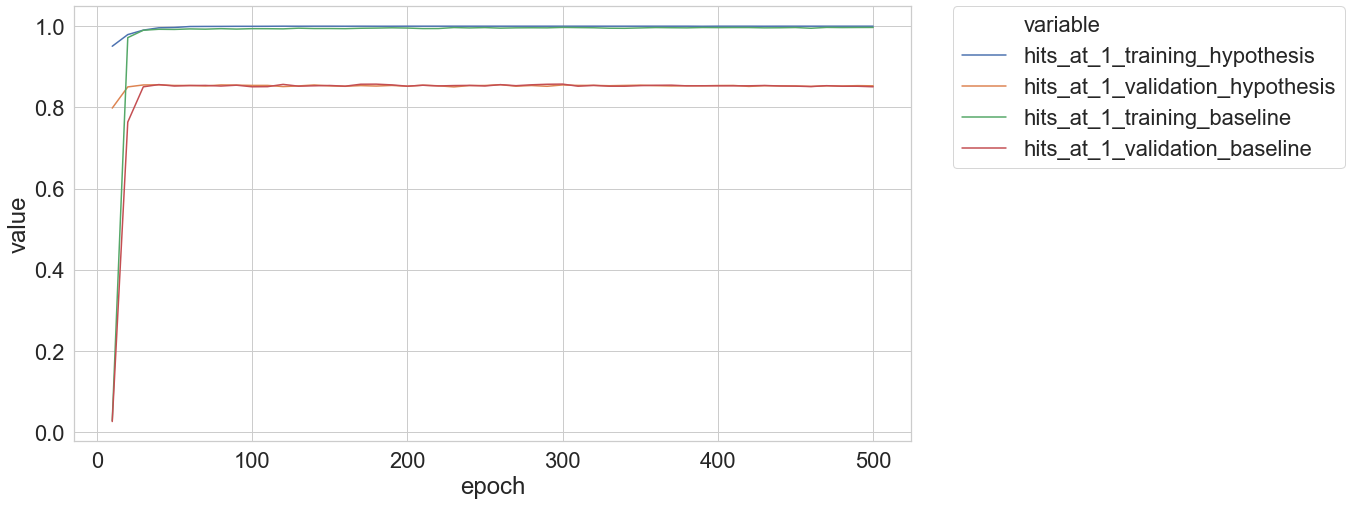

In [39]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 

ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_1[:50], ['epoch']))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('WN18_hits_at_1_Results.png', bbox_inches = "tight", format='PNG')

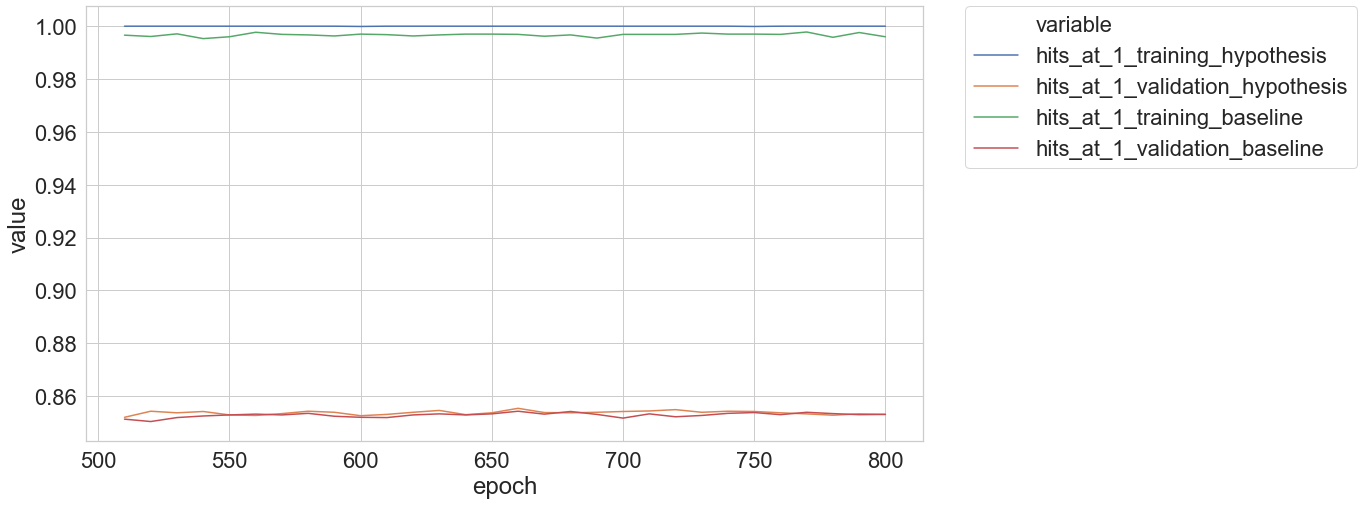

In [40]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 

ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_1[50:], ['epoch']))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('WN18_hits_at_1_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [41]:
path = get_path('hntn_train_validate_and_test_wn18_200d_mean_rank.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Regularised-Relations/results/hntn_train_validate_and_test_wn18_200d_mean_rank.csv'

In [42]:
results_mean_rank = pd.read_csv(path)
results_mean_rank.head()

,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline
0,3.8714,864.8058,834.1225,3781.7904,7050.5038,7041.3344
1,1.0623,748.2443,667.2265,1.1057,552.5296,539.3560
2,1.0257,707.7384,630.9552,1.0249,547.8367,540.8113
3,1.0101,690.5044,614.2904,1.0189,538.9295,523.2687
4,1.0095,682.1920,598.1441,1.0257,545.2447,526.9274


In [43]:
results_mean_rank = results_mean_rank.reset_index()
results_mean_rank.head()

,index,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline
0,0,3.8714,864.8058,834.1225,3781.7904,7050.5038,7041.3344
1,1,1.0623,748.2443,667.2265,1.1057,552.5296,539.3560
2,2,1.0257,707.7384,630.9552,1.0249,547.8367,540.8113
3,3,1.0101,690.5044,614.2904,1.0189,538.9295,523.2687
4,4,1.0095,682.1920,598.1441,1.0257,545.2447,526.9274


In [44]:
results_mean_rank = results_mean_rank.rename(columns={'index': 'epoch'})
results_mean_rank.head()

,epoch,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline
0,0,3.8714,864.8058,834.1225,3781.7904,7050.5038,7041.3344
1,1,1.0623,748.2443,667.2265,1.1057,552.5296,539.3560
2,2,1.0257,707.7384,630.9552,1.0249,547.8367,540.8113
3,3,1.0101,690.5044,614.2904,1.0189,538.9295,523.2687
4,4,1.0095,682.1920,598.1441,1.0257,545.2447,526.9274


In [45]:
results_mean_rank['epoch'] += 1
results_mean_rank.head()

,epoch,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline
0,1,3.8714,864.8058,834.1225,3781.7904,7050.5038,7041.3344
1,2,1.0623,748.2443,667.2265,1.1057,552.5296,539.3560
2,3,1.0257,707.7384,630.9552,1.0249,547.8367,540.8113
3,4,1.0101,690.5044,614.2904,1.0189,538.9295,523.2687
4,5,1.0095,682.1920,598.1441,1.0257,545.2447,526.9274


In [46]:
results_mean_rank_test = results_mean_rank[['mean_rank_test_baseline', 'mean_rank_test_hypothesis']]
results_mean_rank_test.head()

,mean_rank_test_baseline,mean_rank_test_hypothesis
0,7041.3344,834.1225
1,539.3560,667.2265
2,540.8113,630.9552
3,523.2687,614.2904
4,526.9274,598.1441


In [47]:
results_mean_rank_test.min()

mean_rank_test_baseline      494.5910
mean_rank_test_hypothesis    564.5903
dtype: float64

In [48]:
results_mean_rank = results_mean_rank.drop(['mean_rank_test_baseline', 'mean_rank_test_hypothesis'], axis=1)
results_mean_rank['epoch'] = results_mean_rank['epoch'] * 10
results_mean_rank.head()

,epoch,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_training_baseline,mean_rank_validation_baseline
0,10,3.8714,864.8058,3781.7904,7050.5038
1,20,1.0623,748.2443,1.1057,552.5296
2,30,1.0257,707.7384,1.0249,547.8367
3,40,1.0101,690.5044,1.0189,538.9295
4,50,1.0095,682.1920,1.0257,545.2447


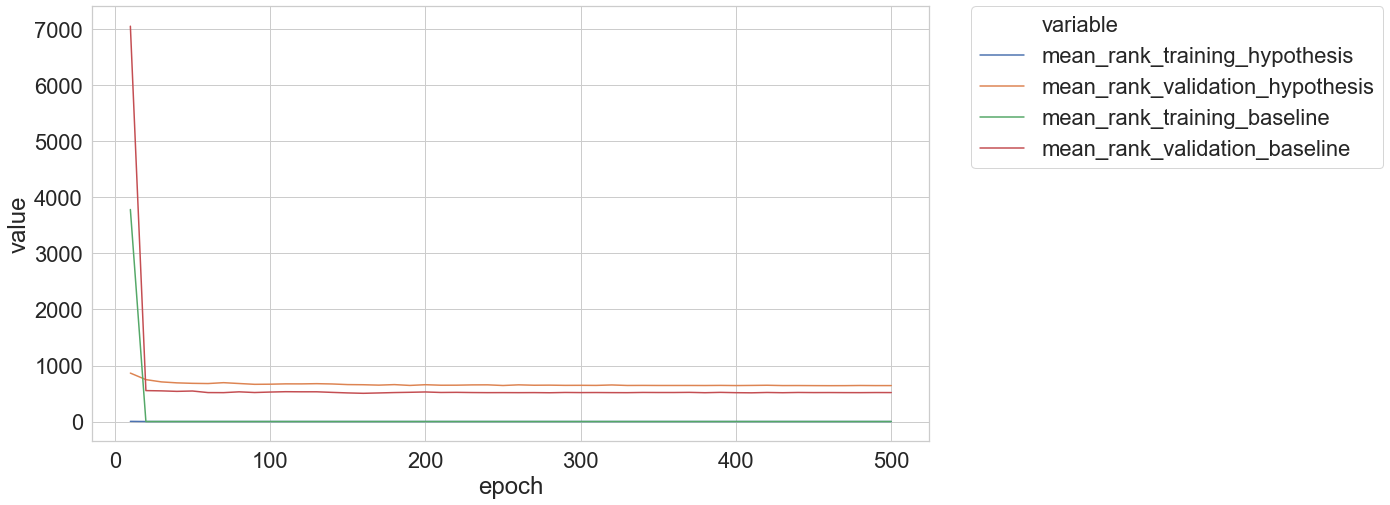

In [49]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 

ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_rank[:50], ['epoch']))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('WN18_mean_rank_Results.png', bbox_inches = "tight", format='PNG')

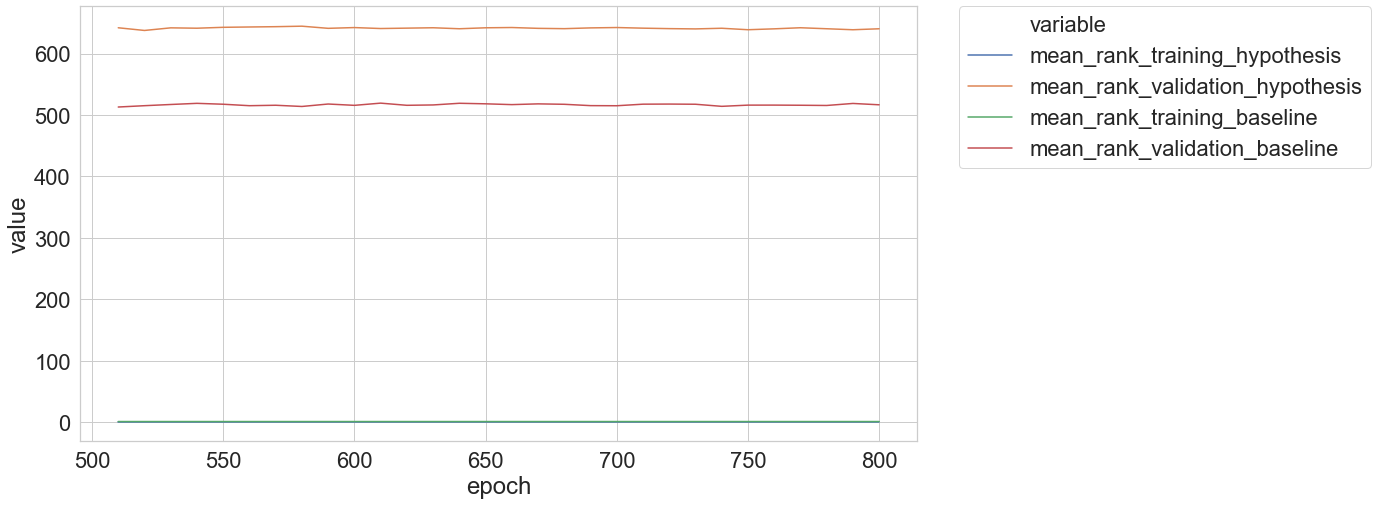

In [50]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 

ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_rank[50:], ['epoch']))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('WN18_mean_rank_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [51]:
path = get_path('hntn_train_validate_and_test_wn18_200d_mean_reciprocal_rank.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Regularised-Relations/results/hntn_train_validate_and_test_wn18_200d_mean_reciprocal_rank.csv'

In [52]:
results_mean_reciprocal_rank = pd.read_csv(path)
results_mean_reciprocal_rank.head()

,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline
0,0.966861,0.839959,0.879503,0.045869,0.042905,0.042502
1,0.987213,0.886621,0.942854,0.982399,0.832727,0.876812
2,0.994004,0.890092,0.944318,0.993839,0.886929,0.944349
3,0.997581,0.890571,0.946752,0.995446,0.890250,0.946392
4,0.998067,0.889286,0.947813,0.994861,0.889113,0.947783


In [53]:
results_mean_reciprocal_rank = results_mean_reciprocal_rank.reset_index()
results_mean_reciprocal_rank.head()

,index,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline
0,0,0.966861,0.839959,0.879503,0.045869,0.042905,0.042502
1,1,0.987213,0.886621,0.942854,0.982399,0.832727,0.876812
2,2,0.994004,0.890092,0.944318,0.993839,0.886929,0.944349
3,3,0.997581,0.890571,0.946752,0.995446,0.890250,0.946392
4,4,0.998067,0.889286,0.947813,0.994861,0.889113,0.947783


In [54]:
results_mean_reciprocal_rank = results_mean_reciprocal_rank.rename(columns={'index': 'epoch'})
results_mean_reciprocal_rank.head()

,epoch,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline
0,0,0.966861,0.839959,0.879503,0.045869,0.042905,0.042502
1,1,0.987213,0.886621,0.942854,0.982399,0.832727,0.876812
2,2,0.994004,0.890092,0.944318,0.993839,0.886929,0.944349
3,3,0.997581,0.890571,0.946752,0.995446,0.890250,0.946392
4,4,0.998067,0.889286,0.947813,0.994861,0.889113,0.947783


In [55]:
results_mean_reciprocal_rank['epoch'] += 1
results_mean_reciprocal_rank.head()

,epoch,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline
0,1,0.966861,0.839959,0.879503,0.045869,0.042905,0.042502
1,2,0.987213,0.886621,0.942854,0.982399,0.832727,0.876812
2,3,0.994004,0.890092,0.944318,0.993839,0.886929,0.944349
3,4,0.997581,0.890571,0.946752,0.995446,0.890250,0.946392
4,5,0.998067,0.889286,0.947813,0.994861,0.889113,0.947783


In [56]:
results_mean_reciprocal_rank_test = results_mean_reciprocal_rank[['mean_reciprocal_rank_test_baseline', 'mean_reciprocal_rank_test_hypothesis']]
results_mean_reciprocal_rank_test.head()

,mean_reciprocal_rank_test_baseline,mean_reciprocal_rank_test_hypothesis
0,0.042502,0.879503
1,0.876812,0.942854
2,0.944349,0.944318
3,0.946392,0.946752
4,0.947783,0.947813


In [57]:
results_mean_reciprocal_rank_test.max()

mean_reciprocal_rank_test_baseline      0.950319
mean_reciprocal_rank_test_hypothesis    0.949894
dtype: float64

In [58]:
results_mean_reciprocal_rank = results_mean_reciprocal_rank.drop(['mean_reciprocal_rank_test_baseline', 'mean_reciprocal_rank_test_hypothesis'], axis=1)
results_mean_reciprocal_rank['epoch'] = results_mean_reciprocal_rank['epoch'] * 10
results_mean_reciprocal_rank.head()

,epoch,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline
0,10,0.966861,0.839959,0.045869,0.042905
1,20,0.987213,0.886621,0.982399,0.832727
2,30,0.994004,0.890092,0.993839,0.886929
3,40,0.997581,0.890571,0.995446,0.890250
4,50,0.998067,0.889286,0.994861,0.889113


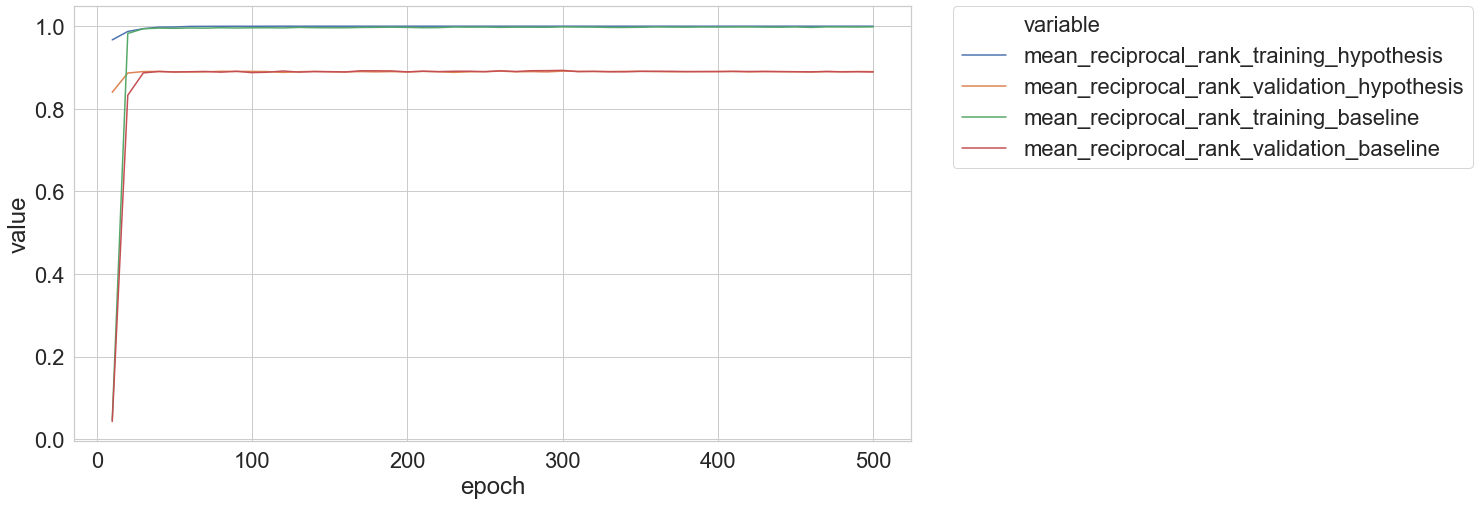

In [59]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 

ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_reciprocal_rank[:50], ['epoch']))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('WN18_mean_reciprocal_rank_Results.png', bbox_inches = "tight", format='PNG')

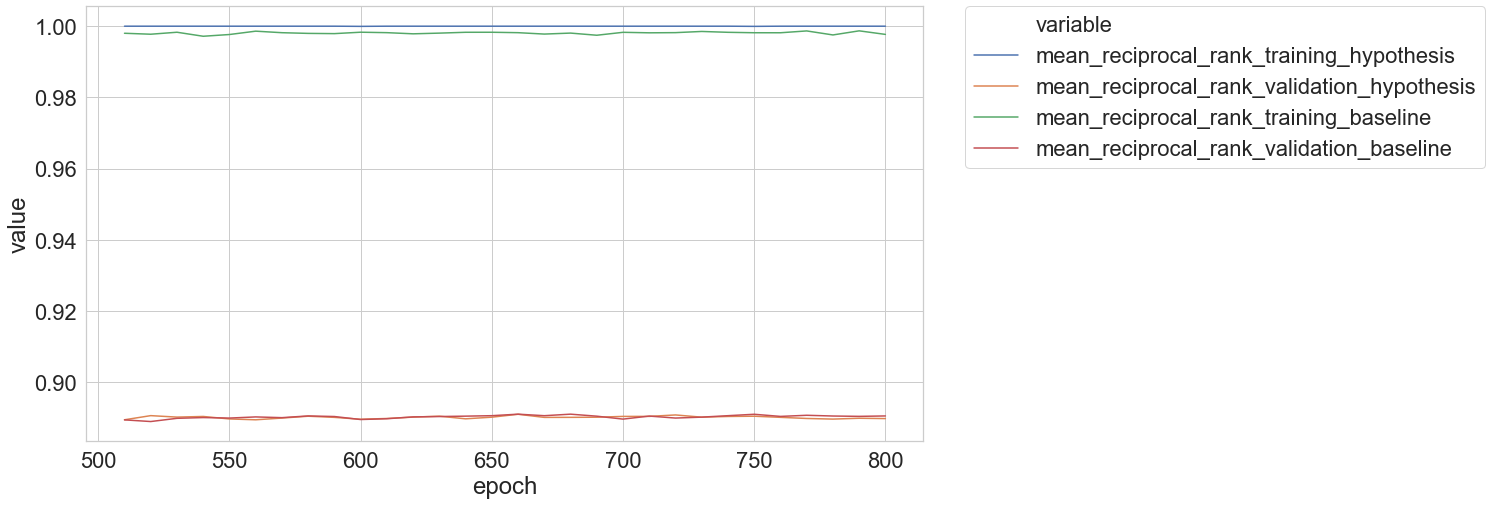

In [60]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 

ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_reciprocal_rank[50:], ['epoch']))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('WN18_mean_reciprocal_rank_Results_Clipped.png', bbox_inches = "tight", format='PNG')